In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data
data = pd.read_csv('ex2data1.txt', names=['First Score', 'Second Score', 'Admission'])

#splitting the data (splitting the features from the target)
x_data = np.array(data.drop(['Admission'], axis=1).values)
y_data = np.array(data['Admission'].values).reshape(len(x_data), 1)

#feature scalling of the data
def feature_normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    new_data = (data - mean) / std
    
    return new_data, mean, std

x_data, mean, std = feature_normalize(x_data)

#formating the data to make it easy to plot
class_zero = []
class_one = []

for index, y in enumerate(y_data):
    if y[0] == 0:
        class_zero.append(x_data[index])
    else: class_one.append(x_data[index])
        
class_one = np.array(class_one)
class_zero = np.array(class_zero)

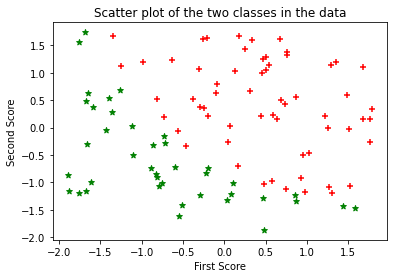

In [3]:
#ploting the data
plt.title('Scatter plot of the two classes in the data')
plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.scatter(class_one[:,0], class_one[:, 1], color='red', marker='+')
plt.scatter(class_zero[:,0], class_zero[:, 1], color='green', marker='*')

In [4]:
#formating the x_data to be a (m, 3) shaped matrix
ones = np.ones((len(x_data), 1))
x_data = np.hstack((ones, x_data))

In [5]:
#creating some utility functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h(x_data, theta):
    return sigmoid(np.dot(x_data, theta))

def cost_function(x_data, y_data, theta):
    first_half = -np.dot(y_data.T, np.log(h(x_data, theta)))
    second_half = -np.dot((1 - y_data).T, np.log(1 - h(x_data, theta)))
    total_cost = first_half + second_half
    
    return total_cost.sum() / len(x_data)

def gradient_descent(x_data, y_data, theta, learning_rate):
    err = h(x_data, theta) - y_data
    dtheta = np.dot(x_data.T, err)
    theta = theta - learning_rate * dtheta
    
    return theta

In [6]:
#creating the training function
def train_model(x_data, y_data, theta, learning_rate, nbr_iter):
    cost = []
    for i in range(nbr_iter):
        cost.append(cost_function(x_data, y_data, theta))
        theta = gradient_descent(x_data, y_data, theta, learning_rate)
        
    return theta, cost

In [7]:
#training the model and finding the optimal solution
initial_theta = np.zeros((3, 1))
nbr_iter = 500
learning_rate = 0.01

theta, cost = train_model(x_data, y_data, initial_theta, learning_rate, nbr_iter)

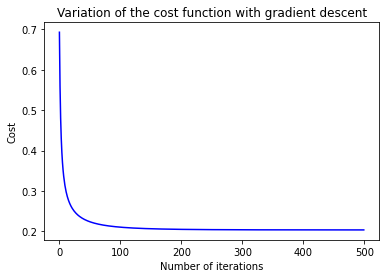

In [8]:
#ploting the variation of the cost function over the number of iterations
x = np.arange(nbr_iter)
plt.title('Variation of the cost function with gradient descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(x, cost, color="blue")

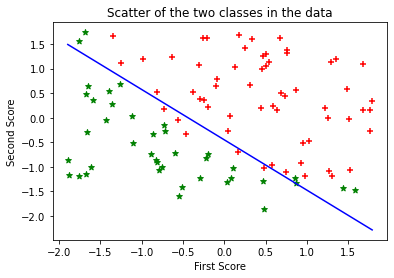

In [9]:
#ploting the data
plt.title('Scatter of the two classes in the data')
plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.scatter(class_one[:,0], class_one[:, 1], color='red', marker='+')
plt.scatter(class_zero[:,0], class_zero[:, 1], color='green', marker='*')

#ploting the model
x_value= np.array([np.min(x_data[:,1]),np.max(x_data[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, color='blue')

In [10]:
#creating the prediction function
def predict_admission(score_one, score_two):
    probabilities = {}
    x_data = np.array([score_one, score_two])
    x_data = (x_data - mean) / std
    x_data = np.append(1, x_data)
    
    probabilities['Admission Probability'] = h(x_data, theta)[0]
    probabilities['Non Admission Probability'] = 1 - h(x_data, theta)[0]
    
    return probabilities

In [11]:
#making some predictions and making sure if the model is working right
print("For a student with scores 45 and 85: ", predict_admission(45, 85))
print("For a student with scores 45 and 50: ", predict_admission(45, 50))
print("For a student with scores 100 and 30: ", predict_admission(100, 30))
print("For a student with scores 80 and 80: ", predict_admission(80, 80))

For a student with scores 45 and 85:  {'Admission Probability': 0.771562351673886, 'Non Admission Probability': 0.22843764832611402}
For a student with scores 45 and 50:  {'Admission Probability': 0.00331060289365762, 'Non Admission Probability': 0.9966893971063424}
For a student with scores 100 and 30:  {'Admission Probability': 0.814958936220051, 'Non Admission Probability': 0.185041063779949}
For a student with scores 80 and 80:  {'Admission Probability': 0.9993391369329596, 'Non Admission Probability': 0.0006608630670403848}
